In [19]:
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
df =pd.DataFrame ({
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'medium', 'medium', 'low', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes']
})
#reading data
def entropy(df):#calculation of entropy for a dataframe
    count=[]
    leng=len(df)
    entropy=[]
    
    for i in df.columns:
        count=df[i].value_counts()
        
        e=0
        for a in count:
            p=a/leng
            e-=p*math.log2(p)
        entropy+=[e]
    return entropy
print(entropy(df))
def entropy_of_series(dt):#calculation of entropy for a series
    value_counts = dt.value_counts()
    total_samples = len(dt)
    entropy_value = 0

    for count in value_counts:
        probability = count / total_samples
        entropy_value -= probability * math.log2(probability)

    return entropy_value

def root_node(data):#finding root node
    target_entropy = entropy_of_series(df["buys_computer"])
    features = ['age', 'income', 'student', 'credit_rating']
    max_information_gain = -1
    root_node_feature = None

    for feature in features:
        weighted_entropy = 0
        unique_values = data[feature].unique()
        for value in unique_values:
            subset = data[data[feature] == value]
            subset_entropy = entropy_of_series(subset['buys_computer'])
            weight = len(subset) / len(data)
            weighted_entropy += weight * subset_entropy
        info_gain= target_entropy - weighted_entropy
        if info_gain > max_information_gain:
            max_information_gain = info_gain
            root_node_feature = feature

    return root_node_feature
print(root_node(df))

[1.5219280948873621, 1.5709505944546684, 1.0, 0.9709505944546686, 0.9709505944546686]
age


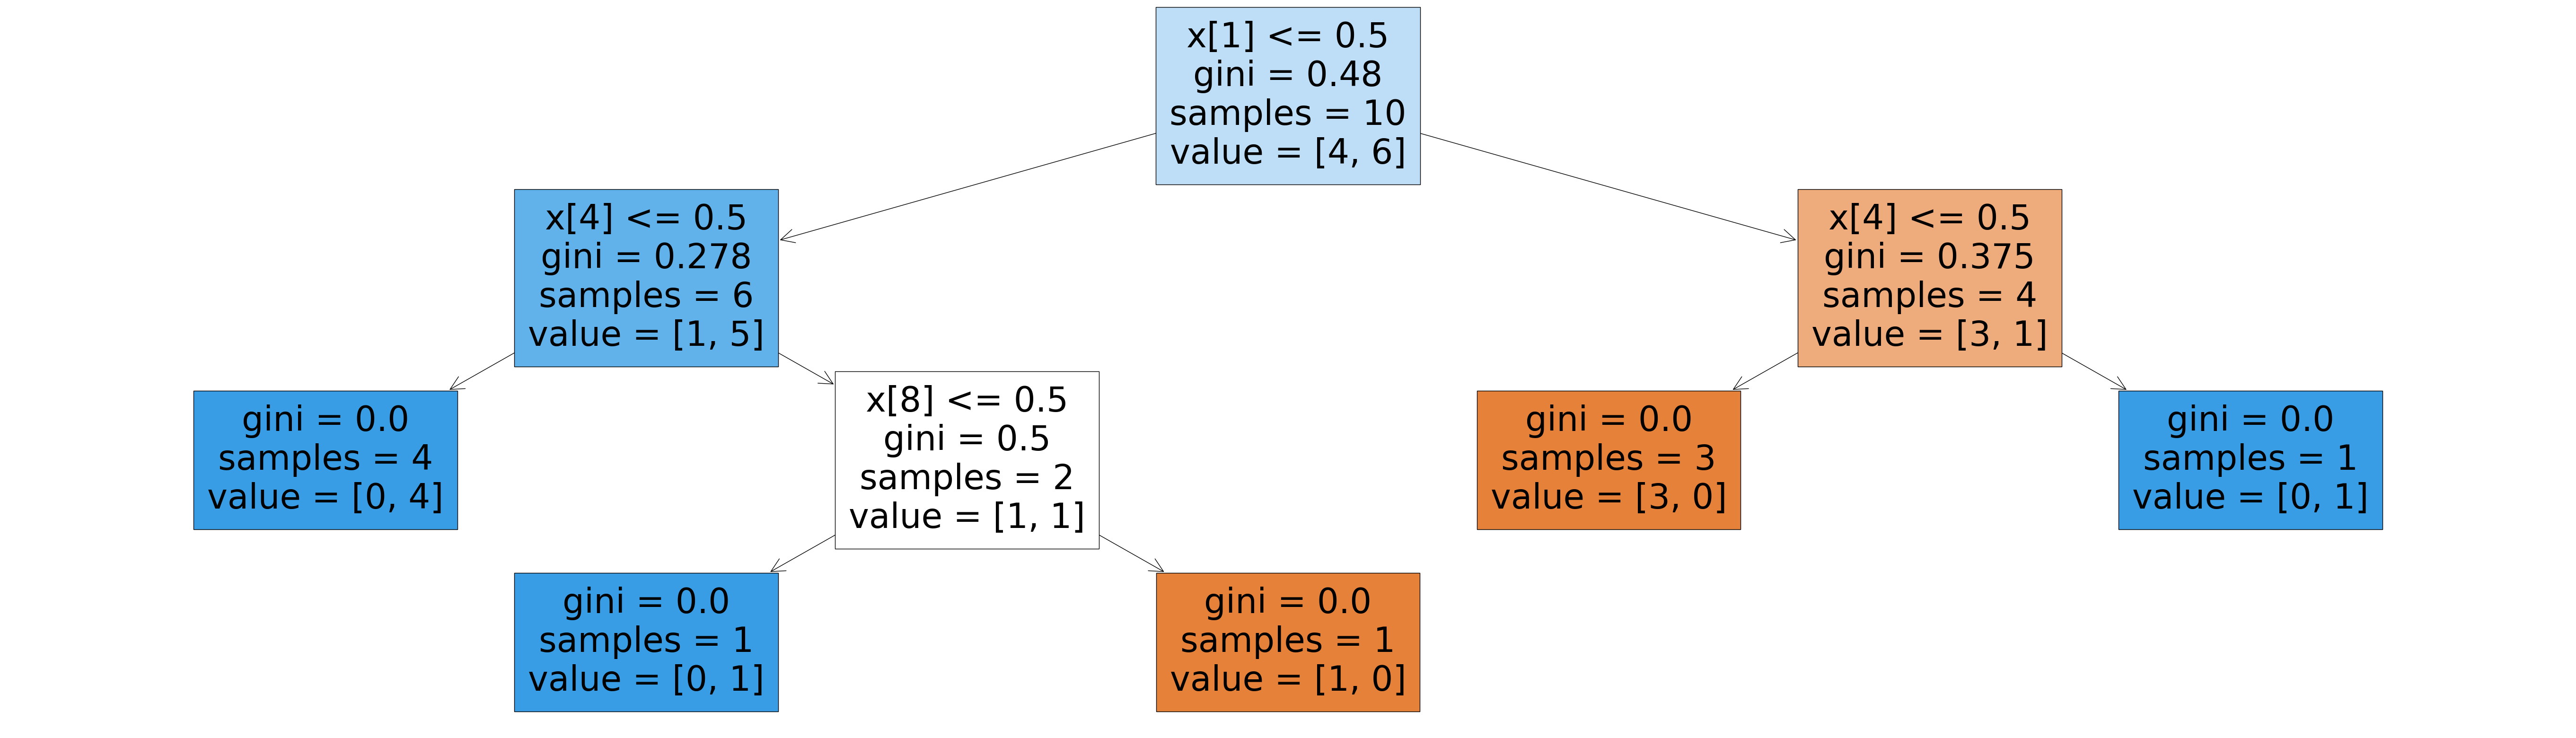

In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def create_decision_tree(data, class_col):#decision  tree
    data_encoded = pd.get_dummies(data, columns=[col for col in data.columns if col != class_col])
    clf = DecisionTreeClassifier()
    X = data_encoded.drop(columns=[class_col])
    y = data_encoded[class_col]
    
    clf.fit(X, y)
    clf.score(X,y)
    return clf

def visualize_decision_tree(tree_model, feature_names, class_names):
    plt.figure(figsize=(70, 20))
    plot_tree(tree_model, filled=True)
    plt.show()


tree_model = create_decision_tree(df, 'buys_computer')

feature_names = list(df.columns)
feature_names.remove('buys_computer') 

class_names = ['buys_computer']  

visualize_decision_tree(tree_model, feature_names, class_names)


In [10]:
dt=pd.read_csv('extracted_features_charrec.csv')
entropy(dt)

[9.729858480210138,
 9.389240078963114,
 10.851502075567192,
 10.24955519759201,
 8.781259315940968,
 10.781983056607572,
 10.120037746162545,
 11.092463049358486,
 10.909853839866498,
 9.913850441777216,
 10.785910991635232,
 9.762416803691396,
 10.53049970414364,
 10.773967109820664,
 9.956865552213033,
 10.976213086026206,
 10.843198621092643,
 10.072143412475631,
 9.558745896333301,
 9.689513263645415,
 9.892385061535045,
 9.47723359849147,
 10.293014406239363,
 9.837277369678006,
 9.721774861849706,
 10.324878694060084,
 10.014814126034679,
 9.742662169420997,
 9.954424636401926,
 10.000822157942226,
 10.090071029417615,
 10.662922066472957,
 9.362021950125268,
 9.95802959318588,
 9.622388552765777,
 10.40672419814732,
 9.540994570649978,
 9.565516068419978,
 9.512471617250906,
 9.430501072461778,
 10.272632069648628,
 8.83118421704455,
 9.125958449847428,
 9.716838282855646,
 9.155458650559277,
 9.684068534833974,
 8.398393002686598,
 9.155456889621467,
 5.485093371540273]

In [11]:
entropy_of_series(dt)

12.174068211955056

Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6373873873873874


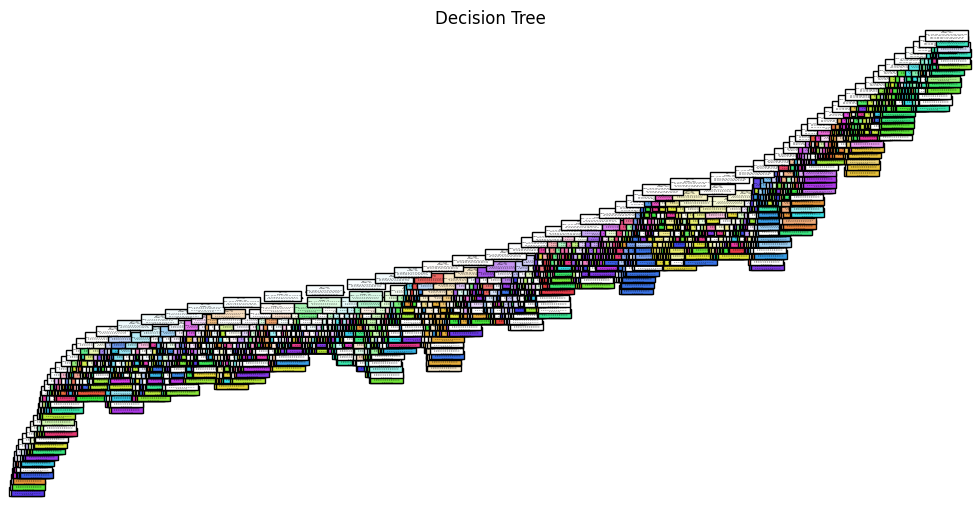

In [12]:
df=pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name'])
y = df['class_name']

# Step 2: Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Step 4: Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()

Training Set Accuracy: 0.20413145539906102
Test Set Accuracy: 0.2072072072072072


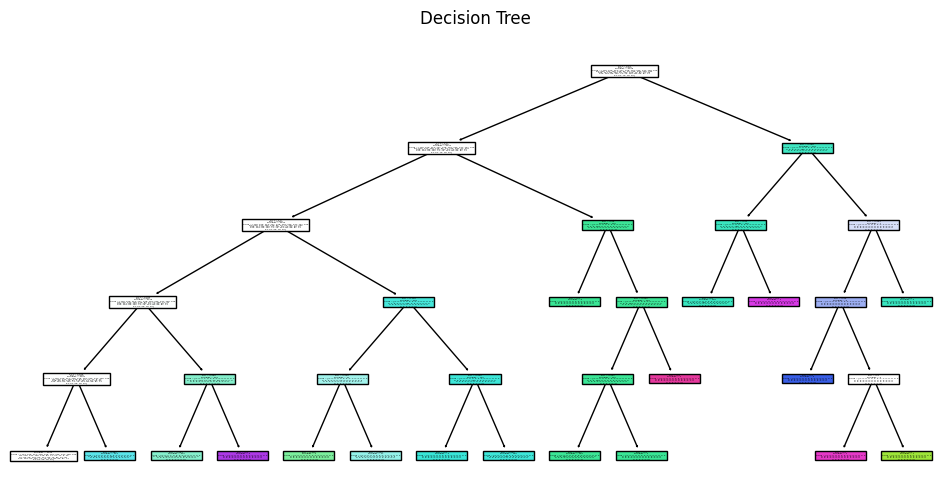

In [15]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)

#  Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

#  Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()

Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6291291291291291


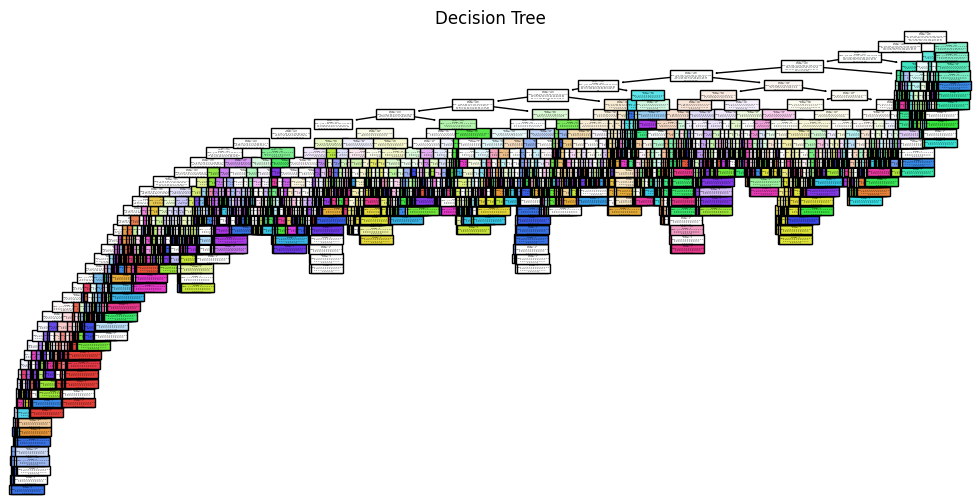

In [18]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(Tr_X, Tr_y)

#  Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

#  Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()

Random Forest Training Set Accuracy: 0.8931455399061032
Random Forest Test Set Accuracy: 0.6629129129129129


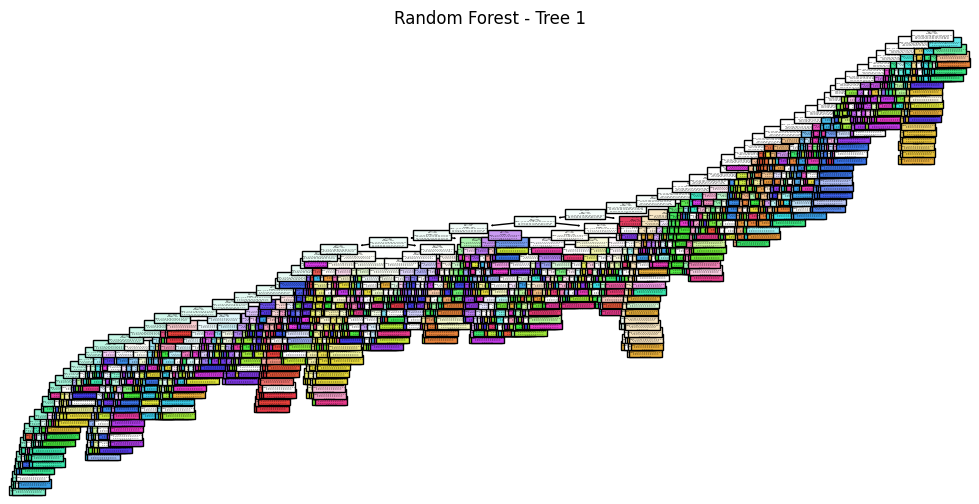

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(Tr_X, Tr_y)

#  Evaluate the accuracy of the Random Forest model (changed from Decision Tree)
rf_training_accuracy = rf_model.score(Tr_X, Tr_y)
rf_test_accuracy = rf_model.score(Te_X, Te_y)

print(f"Random Forest Training Set Accuracy: {rf_training_accuracy}")
print(f"Random Forest Test Set Accuracy: {rf_test_accuracy}")

#  Visualize one of the trees in the Random Forest (similar to Decision Tree)
# You can choose one of the trees in the forest for visualization
# For example, to visualize the first tree in the forest:
plt.figure(figsize=(12, 6))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=list(X.columns))
plt.title("Random Forest - Tree 1")
plt.show()